In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import shutil

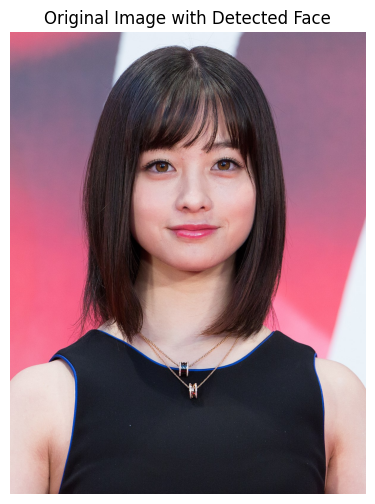

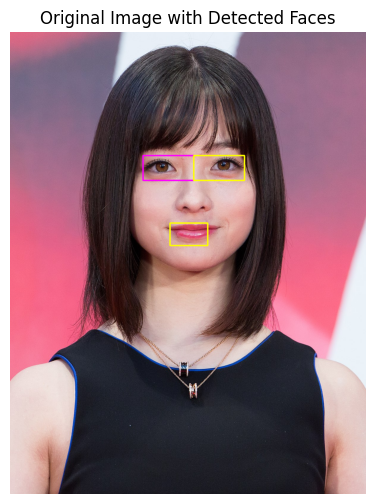

In [4]:
# Load Haar Cascade classifier for face detection
eyes = cv2.CascadeClassifier(r'github\utils\two_eyes_big.xml')
mouth = cv2.CascadeClassifier(r'github\utils\mouth.xml')

# Load the input image
img_path = 'test.jpg'
img = cv2.imread(img_path)

# Convert the image to grayscale (required for face detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using the face_cascade
eyes_detect = eyes.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)
mouth_detect = mouth.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)

# Show the original image with the detected face
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Face')
plt.axis('off')
plt.show()

# Draw bounding boxes around the detected faces and display the image
x_eyes, y_eyes, w_eyes, h_eyes = eyes_detect[0]
x_mouth, y_mouth, w_mouth, h_mouth = mouth_detect[0]

# Draw a rectangle around the detected face
# cv2.circle(img, (x, y), 5, (255, 0, 0), 5)
cv2.rectangle(img, (x_eyes, y_eyes), (x_eyes + w_eyes, y_eyes + h_eyes), (255, 255, 0), 4)#beri rectangle dan beri overlap sebesar 5
cv2.rectangle(img, (x_eyes, y_eyes), (x_eyes + int(w_eyes/2), y_eyes + h_eyes), (255, 0, 255), 4)#beri rectangle dan beri overlap sebesar 5
cv2.rectangle(img, (x_eyes + int(w_eyes/2), y_eyes), (x_eyes + w_eyes, y_eyes + h_eyes), (0, 255, 255), 4)#beri rectangle dan beri overlap sebesar 5
cv2.rectangle(img, (x_mouth, y_mouth), (x_mouth + w_mouth, y_mouth + h_mouth), (0, 255, 255), 4)#beri rectangle dan beri overlap sebesar 5

# Show the original image with the detected faces and bounding boxes
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Faces')
plt.axis('off')
plt.show()

In [ ]:
"""
Label
- label 1 : mulut
- label 2 : mata kanan objek
- label 3 : mata kiri objek
- label 4 : kedua mata
"""

In [2]:
def toYolo(x, y, w, h, image_width, image_height) :
    # Calculate YOLO format values
    cx = (x * 2 + w) / 2
    cy = (y * 2 + h) / 2
    bw = w
    bh = h

    normalized_cx = cx / image_width
    normalized_cy = cy / image_height
    normalized_bw = bw / image_width
    normalized_bh = bh / image_height

    return normalized_cx, normalized_cy, normalized_bw, normalized_bh

def copy(src, dst):
    if os.path.isdir(dst):
        dst = os.path.join(dst, os.path.basename(src))
    shutil.copyfile(src, dst)

In [3]:
# Load Haar Cascade classifier for face detection
eyes = cv2.CascadeClassifier(r'github\utils\two_eyes_big.xml')
mouth = cv2.CascadeClassifier(r'github\utils\mouth.xml')

error = 0

for path, subdirs, files in os.walk('dataset/'):
    for name in tqdm(files) :
        try :
            path_parts = path.split('/')
            label = path_parts[-1]

            # Load the input image
            img_path = os.path.join(path, name)
            img = cv2.imread(img_path)
            image_height, image_width, _ = img.shape

            # Convert the image to grayscale (required for face detection)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image using the face_cascade
            eyes_detect = eyes.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)
            mouth_detect = mouth.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)

            # Draw bounding boxes around the detected faces and display the image
            x_eyes, y_eyes, w_eyes, h_eyes = eyes_detect[0]
            x_mouth, y_mouth, w_mouth, h_mouth = mouth_detect[0]
            x_r_eye, x_l_eye = x_eyes, (x_eyes+w_eyes/2)

            normalized_cx_eyes, normalized_cy_eyes, normalized_bw_eyes, normalized_bh_eyes = toYolo(x_eyes, y_eyes, w_eyes, h_eyes, image_width, image_height)
            normalized_cx_mouth, normalized_cy_mouth, normalized_bw_mouth, normalized_bh_mouth = toYolo(x_mouth, y_mouth, w_mouth, h_mouth, image_width, image_height)
            normalized_cx_r_eye, normalized_cy_r_eye, normalized_bw_r_eye, normalized_bh_r_eye = toYolo(x_r_eye, y_eyes, w_eyes/2, h_eyes, image_width, image_height)
            normalized_cx_l_eye, normalized_cy_l_eye, normalized_bw_l_eye, normalized_bh_l_eye = toYolo(x_l_eye, y_eyes, w_eyes/2, h_eyes, image_width, image_height)

            # Convert to YOLO format line
            yolo_line = f"""1 {normalized_cx_mouth:.6f} {normalized_cy_mouth:.6f} {normalized_bw_mouth:.6f} {normalized_bh_mouth:.6f}
2 {normalized_cx_r_eye:.6f} {normalized_cy_r_eye:.6f} {normalized_bw_r_eye:.6f} {normalized_bh_r_eye:.6f}
3 {normalized_cx_l_eye:.6f} {normalized_cy_l_eye:.6f} {normalized_bw_l_eye:.6f} {normalized_bh_l_eye:.6f}
4 {normalized_cx_eyes:.6f} {normalized_cy_eyes:.6f} {normalized_bw_eyes:.6f} {normalized_bh_eyes:.6f}"""

            labels_folder = f"dataset sinta/labels/{label}"
            images_folder = f"dataset sinta/images/{label}"

            os.makedirs(labels_folder, exist_ok=True)
            os.makedirs(images_folder, exist_ok=True)

            copy(os.path.join(path, name), images_folder)
            with open(os.path.join(labels_folder, f'{name[:-4]}.txt'), 'w') as file:
                file.write(yolo_line)

        except :
            error += 1

print(error)

0it [00:00, ?it/s]
100%|██████████| 19445/19445 [06:02<00:00, 53.58it/s]

9002
